In [1]:
# Li primero es importar las librerias importantes
import pandas as pd
import seaborn as sns

In [17]:
# Leemos el dataset y se lo asignamos a una variable (el csv debe estar en la misma carpeta)
df = pd.read_csv("abas.csv", encoding='latin-1') 

In [18]:
# Para visualizar la data, simplemente llamamos a la variable
df

,Códigos de producto,Precio,Cliente,Código de cliente,Pedidos,Total
0,49631Foun,$14.49,Rockland's,ARLVA283,152,"$2,202.48"
1,49541Eyel,$7.94,Rockland's,ARLVA425,50,$397.00
2,13230Masc,$11.73,Rockland's,ARLVA519,78,$914.94
3,68713Exfo,$15.77,Rockland's,ARLVA727,514,"$8,105.78"
4,69601Exfo,$11.05,Rockland's,ARLVA851,850,"$9,392.50"
5,17269Masc,$14.95,Rockland's,ARLVA876,381,"$5,695.95"
6,25331Glos,$7.58,Rockland's,ARLVA924,169,"$1,281.02"
7,61207Foun,$9.83,Rudiger Pharmacy,CHEMD323,588,"$5,780.04"
8,85021Foun,$11.75,Rudiger Pharmacy,CHEMD339,707,"$8,307.25"
9,96799Foun,$10.07,Rudiger Pharmacy,CHEMD365,602,"$6,062.14"


In [19]:
# La funcion .shape nos permite saber el numero de columnas y filas que tiene un dataset
df.shape

(32, 6)

In [16]:
# La funcion .describe nos indica metricas de estadisticas descriptivas (min,max,avg)
df.describe()

,Pedidos
count,30.000000
mean,424.066667
std,259.190641
min,50.000000
25%,199.500000
50%,371.500000
75%,616.250000
max,972.000000


*Inicio del analisis de datos*

In [21]:
# Para iniciar con el analisis de datos, podemos inciar buscando duplicados
# Le indicamos desde que columna queremos buscar los duplicados
# .duplicated() te regresa un analisis fila por fila de True/False (Muchas filas para analizar)
# Puedes combinarlo con .sum() para tener un numero que indique cuantos valores duplucados tenemos 
df["Códigos de producto"].duplicated().sum()

2

In [29]:
# Para eliminar valores duplicados usamos drop_duplicates()
df = df.drop_duplicates()

In [30]:
df["Códigos de producto"].duplicated().sum() 
# 0 significa que no hay duplicados

0

In [31]:
# Para eliminar valores nulos de algunas filas usamos .dropna
df = df.dropna(subset=["Códigos de producto"])

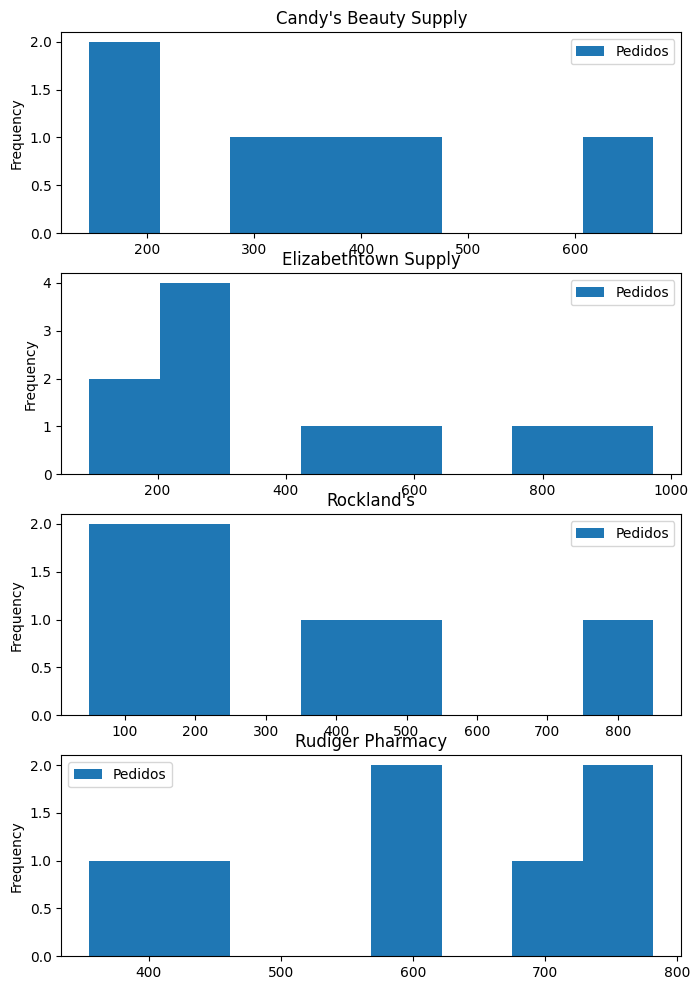

In [47]:
# *** Histograma ***
# Vamos a hacer un histograma para saber un poco de las metricas de forma visual
ax = df.plot.hist(column=["Pedidos"], by='Cliente', bins=8, figsize=(8,12))
# *column*  es es que se va a basar cada barra (en nuestro caso quiero saber el numero de pedidos)
# *by* es la forma en la que se separan las tablas (en nuestro caso son 4 clientes = 4 tablas)
# *bins* es cuantos contenedores por tabla totales (a mayor numero, menos ancho caa contenedor)
# *figsize* es el tamaño de las tablas (largo,alto)

<Axes: xlabel='Cliente', ylabel='Pedidos'>

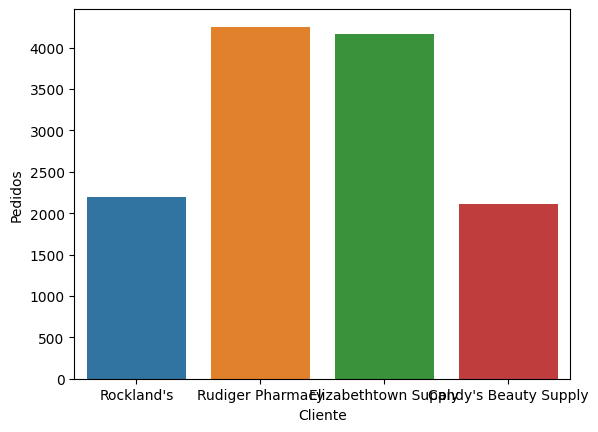

In [52]:
# Si queremos promediar los la media de pedidos por cliente
sns.barplot(data=df, x="Cliente", y="Pedidos", errorbar=None, estimator=sum)
# Nos devuelve la suma de cantidad por pedido, divido por cada cliente